In [127]:
#common imports to bring into your notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint , proportions_ztest
%matplotlib inline
sns.set(color_codes=True)

#imports needing a !pip install
!pip install fitter
from fitter import Fitter

In [ ]:
#SECTION 5.1 BEGINS HERE

In [ ]:
#note, if you have an error relted to "fitter," run the following line of code:

# !pip install fitter

In [ ]:
#great seaborn data sets to easily load
#https://github.com/mwaskom/seaborn-data

In [2]:
#list of all read ins for sns datasets
df_anscombe=sns.load_dataset("anscombe")
df_attention=sns.load_dataset("attention")
df_brain_networks=sns.load_dataset("brain_networks")
df_car_crashes=sns.load_dataset("car_crashes")
df_diamonds=sns.load_dataset("diamonds")
df_dots=sns.load_dataset("dots")
df_exercise=sns.load_dataset("exercise")
df_flights=sns.load_dataset("flights")
df_fmri=sns.load_dataset("fmri")
df_gammas=sns.load_dataset("gammas")
df_geyser=sns.load_dataset("geyser")
df_iris=sns.load_dataset("iris")
df_mpg=sns.load_dataset("mpg")
df_penguins=sns.load_dataset("penguins")
df_planets=sns.load_dataset("planets")
df_tips=sns.load_dataset("tips")
df_titanic=sns.load_dataset("titanic")

In [ ]:
df_tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


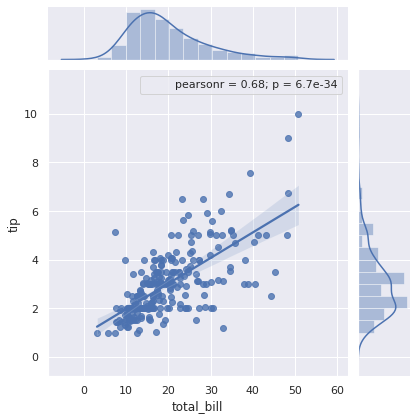

In [ ]:
sns.jointplot(x = "total_bill", y ="tip", data = df_tips, kind = "reg").annotate(st.pearsonr)
plt.show()

In [ ]:
data1=df_tips["total_bill"]
data2=df_tips["tip"]

In [ ]:
f1 = Fitter(data1)
f2 = Fitter(data2)

In [ ]:
f1.fit()

In [ ]:
f2.fit()

,sumsquare_error,aic,bic,kl_div
triang,0.000280,1300.383718,-1878.884398,inf
beta,0.000281,1312.824886,-1873.288611,inf
gausshyper,0.000283,1319.545512,-1862.348043,inf
skewnorm,0.000284,1321.875513,-1876.877690,inf
gengamma,0.000284,1317.112979,-1871.530067,inf


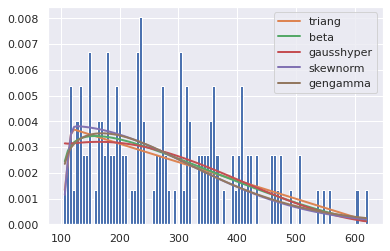

In [ ]:
f1.summary()

In [ ]:
f2.summary()

In [ ]:
# SECTION 5.1 ENDS HERE

In [ ]:
# SECTION 5.3 BEGINS HERE

In [ ]:
#looking back at the fitter results of total_bill and tips

#maybe we want to compare the likelihood of a certain tip amount compared to a certain bill amount
#different "amounts" shown in each distribution
#when working with sizably different amounts, even if the unit is the same, it helps to standardize
#we can always "undo this" after running calculations to return to the real value version of the data point(s)

In [3]:
#getting necessary stats here...sample mean, sample standard deviation, and number of samples 
#ddof = 1 forces this to be sample standard deviation...a huge suggestion going forward from here on out!
mean_bill = df_tips["total_bill"].mean()
stdev_bill = df_tips["total_bill"].std(ddof = 1)

mean_tip = df_tips["tip"].mean()
stdev_tip = df_tips["tip"].std(ddof = 1)

In [4]:
df_tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df_tips["Stand_Bill"] = (df_tips["total_bill"] - mean_bill) / stdev_bill 

In [6]:
df_tips["Stand_Tip"] = (df_tips["tip"] - mean_tip) / stdev_tip 

In [7]:
df_tips

,total_bill,tip,sex,smoker,day,time,size,Stand_Bill,Stand_Tip
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314066,-1.436993
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.061054,-0.967217
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137497,0.362610
3,23.68,3.31,Male,No,Sun,Dinner,2,0.437416,0.225291
4,24.59,3.61,Female,No,Sun,Dinner,4,0.539635,0.442111
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.038377,2.111622
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.830568,-0.721488
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.323964,-0.721488
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.220833,-0.902171


In [ ]:
# END OF SECTION 5.3

In [ ]:
#BEGINS SECTION 5.4...review stuff from section 5.3 first!!!

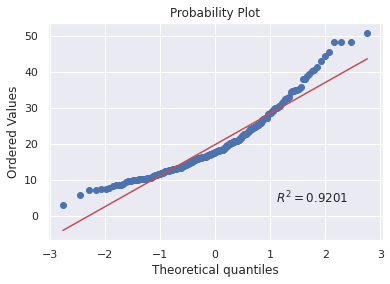

In [ ]:
st.probplot(df_tips["total_bill"], dist="norm", fit=True, rvalue=True, plot=plt)
plt.show()

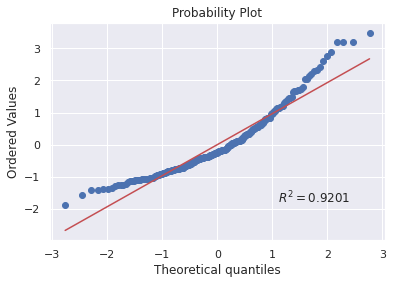

In [ ]:
st.probplot(df_tips["Stand_Bill"], dist="norm", fit=True, rvalue=True, plot=plt)
plt.show()

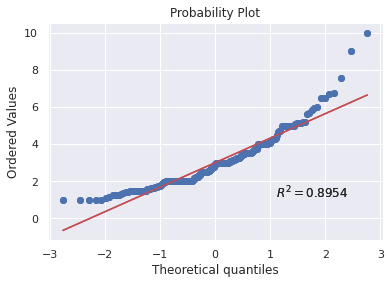

In [ ]:
st.probplot(df_tips["tip"], dist="norm", fit=True, rvalue=True, plot=plt)
st.probplot(df_tips["tip"], dist="norm", fit=True, rvalue=True, plot=plt)
plt.show()

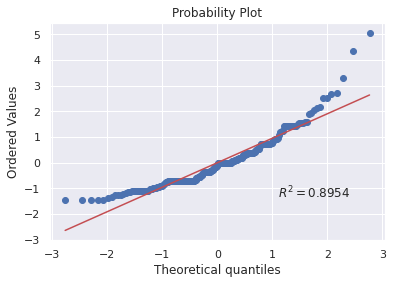

In [ ]:
st.probplot(df_tips["Stand_Tip"], dist="norm", fit=True, rvalue=True, plot=plt)
plt.show()

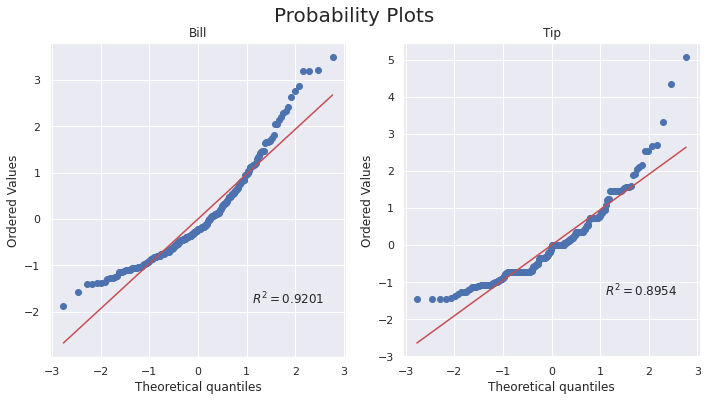

In [59]:
fig = plt.subplots(figsize=(10,10))

ax1 = plt.subplot(221)
res = st.probplot(df_tips["Stand_Bill"], dist="norm", fit=True, rvalue=True, plot=plt)
ax1.set_title("Bill")

ax2 = plt.subplot(222)
res = st.probplot(df_tips["Stand_Tip"], dist="norm", fit=True, rvalue=True, plot=plt)
ax2.set_title("Tip")

plt.suptitle("Probability Plots", y= 1.01, fontsize = 20)
plt.tight_layout()
plt.show()

In [ ]:
#END OF SECTION 5.4

In [ ]:
#BEGINS SECTION 5.5

In [ ]:
#for this section we'll work with the df_diamonds dataframe

#we'll start off with examining the steps needed to create a 95% C.I. for categorical data, let's take a look at our df's info

In [60]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [61]:
#lets take a took at our "cut" column
df_diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [62]:
#our goal wil be to utilize this sample data to create a 95% C.I. to estimate the true population proportion
#of diamonds that would be considered "ideal"

#to do this, we'll use a new import of

#import statsmodels.api as sm
#from statsmodels.stats.proportion import proportion_confint 

In [63]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint 

In [64]:
#to figure out our point estimate, in this case the sample proportion we have our successes but need the total obs
# we can either manually add the value count totals here, or just look at the range index from df.info()

#in either case we get 53,940!
21551+13791+12082+4906+1610

53940

In [65]:
proportion_confint(count=21551,    # Number of "successes"
                   nobs=53940,    # Number of trials
                   alpha=(1 - 0.95)) # Alpha, which is 1 minus the confidence level

(0.39540305804708686, 0.4036699860760129)

In [66]:
proportion_confint(count=21551,    # Number of "successes"
                   nobs=53940,    # Number of trials
                   alpha=0.05) # Alpha, which is 1 minus the confidence level

(0.39540305804708686, 0.4036699860760129)

In [67]:
#now, if we wanted to combine with this a hypothesis test, we have to options
#a 95% CI is esssentially a hypothesis test, in the two tailed fashion
#if a proposed value is within the interval, we would "fail to reject"
#if it was above or below the interval, we can "reject Ho"

#however, sometimes we want to use a hypotheis test looking for value specifically greater/lesser

#let's take a look at all three options now

In [68]:
from statsmodels.stats.proportion import proportions_ztest

In [69]:
21551/53940

0.3995365220615499

In [70]:
#lets say we had an expert claim that at least 45% of the diamonds were ideal...lets examine
#alternative options are: 'two-sided' 'smaller' ' larger'
proportions_ztest(count=21551,
                  nobs=53940,
                  value=0.45,  # The hypothesized value of population proportion p
                  alternative='larger') # Tests the "not equal to" alternative hypothesis

                  # output is a tuple; the first entry is the value of the test statistic, and  # the second is the p-value

(-23.928259432746856, 1.0)

In [71]:
# here we see our P- value is def not less than 0.05, so we fail to reject

#lets look at a smaller example

In [72]:
#lets say we had an expert claim that at least 45% of the diamonds were ideal...lets examine
#alternative options are: 'two-sided' 'smaller' ' larger'
proportions_ztest(count=21551,
                  nobs=53940,
                  value=0.45,  # The hypothesized value of population proportion p
                  alternative='smaller') # Tests the "not equal to" alternative hypothesis

(-23.928259432746856, 7.781657775982702e-127)

In [73]:
#def can reject...now looking at not equal to which is the same designed result as a 95% CI

In [74]:
#lets say we had an expert claim that at least 45% of the diamonds were ideal...lets examine
#alternative options are: 'two-sided' 'smaller' ' larger'
proportions_ztest(count=21551,
                  nobs=53940,
                  value=0.45,  # The hypothesized value of population proportion p
                  alternative='two-sided') # Tests the "not equal to" alternative hypothesis

(-23.928259432746856, 1.5563315551965404e-126)

In [75]:
#boom reject again

In [76]:
#now, if we want to look for differences between two samples proportions, there's not an ideal package

#but we can create one ourselves and this way we have it saved for future use!

In [77]:
def two_proprotions_confint(success_a, size_a, success_b, size_b, significance):

    prop_a = success_a / size_a
    prop_b = success_b / size_b
    var = prop_a * (1 - prop_a) / size_a + prop_b * (1 - prop_b) / size_b
    se = np.sqrt(var)

    # z critical value
    confidence = 1 - significance
    z = st.norm(loc = 0, scale = 1).ppf(confidence + significance / 2)

    # standard formula for the confidence interval
    # point-estimtate +- z * standard-error
    prop_diff = prop_b - prop_a
    confint = prop_diff + np.array([-1, 1]) * z * se
    return prop_diff, confint

In [79]:
#lets take a took at our "cut" column
df_diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [88]:
#talk about interpretation
prop_diff, confint = two_proprotions_confint(12082, 53940, 13791, 53940, 0.05)
print('estimate difference:', prop_diff)
print('confidence interval:', confint)

estimate difference: 0.03168335187245086
confidence interval: [0.02659102 0.03677568]


In [89]:
def two_proprotions_test(success_a, size_a, success_b, size_b):

    prop_a = success_a / size_a
    prop_b = success_b / size_b
    prop_pooled = (success_a + success_b) / (size_a + size_b)
    var = prop_pooled * (1 - prop_pooled) * (1 / size_a + 1 / size_b)
    zscore = np.abs(prop_b - prop_a) / np.sqrt(var)
    one_side = 1 - st.norm(loc = 0, scale = 1).cdf(zscore)
    pvalue = one_side * 2
    return zscore, pvalue

In [90]:
#talk about interpretation, assume 0.05 alpha
zscore, pvalue = two_proprotions_test(12082, 53940, 13791, 53940)

print('Zscore:', zscore)
print('Pvalue:', pvalue)

Zscore: 12.186070182309017
Pvalue: 0.0


In [ ]:
# end of section 5.5

In [ ]:
#begins section 5.6

In [ ]:
pip install pingouin

In [128]:
from statsmodels.stats.weightstats import zconfint, ztest, ttest_ind
import pingouin as pg

In [ ]:
df_diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#this is a generalize version of a quantitative confidence interval
zconfint(df_diamonds["price"], alpha=0.05)

(3899.1327133652603, 3966.466730461214)

In [ ]:
#working with a Z score hypothesis test, similar to the proportion test used above
#lets look at a value fo 3967, which we know is very close to our 95% CI upper bound above
ztest(df_diamonds["price"],
      value=3967, 
      alternative='two-sided')

(-1.9910088897796505, 0.04647990992571104)

In [ ]:
#even with a value so close to the U.B. of the 95% CI, we still reject!

In [ ]:
#this interval assumes we are working with population level data for the standard deviation, hence using
#Z scores instead of T scores

#while this is the common interval taught in most statistics courses, I recommend using more specified 
#C.I. and testing techniques for sample data

In [111]:
#FIRST OBJECTIVE IS WORKING WITH STUDENTS T INTERVAL

#HERE WE HAVE APPROXIMATELY EQUAL VARIANCE, AND INDEPENDENT SAMPLES

In [ ]:
st.t.interval(alpha = 0.95,              # Confidence level
                 df= len(df_diamonds) - 1,                    # Degrees of freedom
                 loc = df_diamonds["depth"].mean(),         # Sample mean
                 scale = df_diamonds["depth"].std())             # Standard deviation estimate

(58.941455696949006, 64.55735409170347)

In [ ]:
#typically we are just looking for differences here, in order to get the larger/smaller we would need
#to create a definition, which we'll skip as in most cases it is unneeded
st.ttest_1samp(df_diamonds["depth"], popmean=57)

Ttest_1sampResult(statistic=769.9513005692753, pvalue=0.0)

In [196]:
pg.ttest(x = df_diamonds["depth"],y=57)

/usr/local/lib/python3.6/dist-packages/pingouin/bayesian.py:150: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,769.951301,53939,two-sided,0.0,"[4.74, 4.76]",3.315185,inf,1.0


In [198]:
#to get the actual CI at 95%, take the mean and + - the CI above
df_diamonds["depth"].mean()

61.74940489432624

In [ ]:
#here is look at two different sample and looking for a difference

In [ ]:
#pooled in used when we assume equal variance and independence!
ttest_ind(df_diamonds["depth"],df_diamonds["table"] , alternative='two-sided', usevar='pooled', value=0)

(375.5659398379194, 0.0, 107878.0)

In [195]:
pg.ttest(x= df_diamonds["depth"],y = df_diamonds["table"] , paired= False, tail = "two-sided", correction = False)

/usr/local/lib/python3.6/dist-packages/pingouin/bayesian.py:150: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,375.56594,91873.556449,two-sided,0.0,"[4.27, 4.31]",2.286892,inf,1.0


In [145]:
#WELCH ' ST INTERVAL...INDEPENDENT WITH UNEQUAL VARIANCE

In [146]:
df_diamonds["depth"].var()

2.05240384317702

In [147]:
df_diamonds["table"].var()

4.992948075335832

In [ ]:
#now considering what exactly is considered equal...it varies
#thus, it is ideal to essentially always use this variation of Welch's T-Interval and Test

In [150]:
ttest_ind(df_diamonds["depth"],df_diamonds["table"] , alternative='two-sided', usevar='unequal', value=0)

(375.5659398379194, 0.0, 91873.55644944074)

In [190]:
#correction true since we are assuming uneqal variance
pg.ttest(x= df_diamonds["depth"],y = df_diamonds["table"] , paired= False, tail = "two-sided", correction = True)

/usr/local/lib/python3.6/dist-packages/pingouin/bayesian.py:150: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,375.56594,91873.556449,two-sided,0.0,"[4.27, 4.31]",2.286892,inf,1.0


In [157]:
#working with dependent samples, meaning they are related or repeated samples

#lets get some randomly sampled data as an example here

In [158]:
set1 = df_diamonds["depth"].sample(n=30, replace=False)
set2 = df_diamonds["depth"].sample(n=30, replace=False)

In [159]:
#working with dependent samples, meaning they are related or repeated samples
st.ttest_rel(set1, set2, axis=0, nan_policy='omit')

Ttest_relResult(statistic=0.3592540844407581, pvalue=0.72200771730959)

In [192]:
#correction false since we are assuming equal variance
pg.ttest(x= set1,y = set2 , paired= True, tail = "two-sided", correction = False)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.359254,29,two-sided,0.722008,"[-0.45, 0.65]",0.0867,0.206,0.074502


In [199]:
#BEGINS SECTION 5.7 ANOVA

In [200]:
#built-in datasets describing the pain threshold per hair color...PRETTY UNIQUE!
df = pg.read_dataset('anova')

In [201]:
df.head(10)

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48
5,6,Dark Blond,63
6,7,Dark Blond,57
7,8,Dark Blond,52
8,9,Dark Blond,41
9,10,Dark Blond,43


In [202]:
df = df.drop(columns = "Subject", axis= 1)

In [204]:
df.head(10)

,Hair color,Pain threshold
0,Light Blond,62
1,Light Blond,60
2,Light Blond,71
3,Light Blond,55
4,Light Blond,48
5,Dark Blond,63
6,Dark Blond,57
7,Dark Blond,52
8,Dark Blond,41
9,Dark Blond,43


In [207]:
# a little bit of cleaning to make our later usage of statsmodels more friendly
#making things lower case and replacing a space with an underscore in our headers
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

In [209]:
df.head(10)

,hair_color,pain_threshold
0,Light Blond,62
1,Light Blond,60
2,Light Blond,71
3,Light Blond,55
4,Light Blond,48
5,Dark Blond,63
6,Dark Blond,57
7,Dark Blond,52
8,Dark Blond,41
9,Dark Blond,43


In [213]:
#looking at an ANOVA test using statsmodels
import statsmodels.formula.api as smf

ols_model = smf.ols("pain_threshold ~ hair_color", data = df).fit()

anova1 = sm.stats.anova_lm(ols_model)

anova1

,df,sum_sq,mean_sq,F,PR(>F)
hair_color,3.0,1360.726316,453.575439,6.791407,0.004114
Residual,15.0,1001.800000,66.786667,NaN,NaN


In [218]:
#how it works with pingouin
anova2 = pg.anova(dv='pain_threshold', between='hair_color', data=df, detailed=True)

anova2

,Source,SS,DF,MS,F,p-unc,np2
0,hair_color,1360.726316,3,453.575439,6.791407,0.004114,0.575962
1,Within,1001.800000,15,66.786667,NaN,NaN,NaN


In [216]:
#how it works with pingouin...Welch version
anova3 = pg.welch_anova(dv='pain_threshold', between='hair_color', data=df)

anova3

,Source,ddof1,ddof2,F,p-unc,np2
0,hair_color,3,8.329841,5.890115,0.018813,0.575962


In [219]:
pip install bootstrapped

  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13954 sha256=6015d464245032cc72bd78a5fcb7c054d47f1b1874e41323adf90ee3de4327f3
  Stored in directory: /root/.cache/pip/wheels/38/23/ee/3493dbb0019f511085117a962bfadb1f7d221e7b78761943a7
Successfully built bootstrapped


In [230]:
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats

import numpy.random as npr

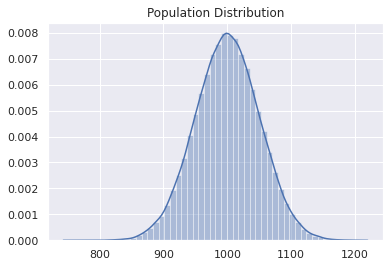

In [231]:
mean = 1000
stdev = 50

pop = np.random.normal(loc=mean, scale=stdev, size=100000)

sns.distplot(pop, bins=50, hist=True, kde=True)
plt.title("Population Distribution")
plt.show()

In [232]:
#taking 10k samples from the larger population
samps = pop[:10000]

In [233]:
#getting the bootstrap mean & stdev!
BS_mean = bs.bootstrap(samps, stat_func=bs_stats.mean)

BS_stdev = bs.bootstrap(samps, stat_func=bs_stats.std)

In [234]:
print('Bootstrapped mean should be: {}'.format(mean))
print('\t' + str(BS_mean))
print('')
print('Bootstrapped stdev should be: {}'.format(stdev))
print('\t' + str(BS_stdev))

Bootstrapped mean should be: 1000
	999.8115817073638    (998.8376429632386, 1000.8068425417506)

Bootstrapped stdev should be: 50
	50.25734045285762    (49.54445567058994, 50.95648017171403)


In [235]:
#lets compare our bootstrap method with the T- distribution we've discucssed
samp_amount = [10, 30, 50, 100, 500, 1000, 2500, 5000, 8000, 10000]

bootstrap_res = []

tdist_res = []

#for loop to handle our execution for us
for i in samp_amount:
    samps = np.random.choice(pop, i, replace=True)
    bsres = bs.bootstrap(samps, stat_func=bs_stats.mean, alpha=0.05)
    
    tres = st.t.interval(0.95, len(samps)-1, loc=np.mean(samps), scale=st.sem(samps))

    bootstrap_res.append((bsres.lower_bound, bsres.upper_bound))
    tdist_res.append(tres)

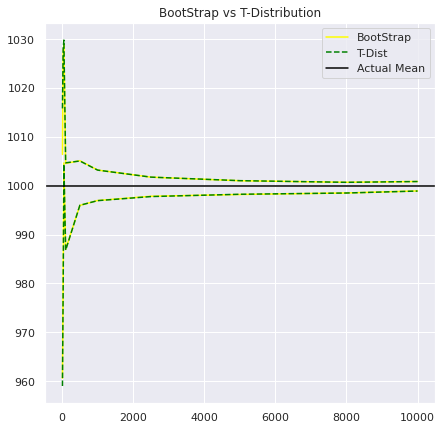

In [243]:
plt.subplots(figsize=(7,7))

plt.plot(samp_amount, [x[1] for x in bootstrap_res], color='yellow')
plt.plot(samp_amount, [x[1] for x in tdist_res], linestyle='--', color='green')

plt.plot(samp_amount, [x[0] for x in bootstrap_res], color='yellow',label='BootStrap')
plt.plot(samp_amount, [x[0] for x in tdist_res], linestyle='--', color='green', label='T-Dist')

plt.axhline(pop.mean(), c='black', label='Actual Mean')
plt.legend(loc='best')
plt.title('BootStrap vs T-Distribution')
plt.show()